In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("/content/coronaviridae-genome (1).csv")
df.head()

,Unnamed: 0,Phe,Leu,Ile,Met,Val,Ser,Pro,Thr,Ala,Tyr,His,Gln,Asn,Lys,Asp,Glu,Cys,Trp,Arg,Gly,Status
0,0,8.103091,11.455717,5.209130,2.063995,7.163918,7.054712,2.140439,5.307415,3.254341,5.471224,2.413454,1.965709,3.811292,3.691165,2.555422,1.878344,7.589822,3.057770,3.505515,3.571039,alphacoronavirus
1,1,8.081249,11.422955,5.209130,2.085836,7.152998,7.065633,2.151360,5.318336,3.254341,5.503986,2.391613,1.998471,3.789451,3.691165,2.555422,1.878344,7.600743,3.046849,3.505515,3.592880,alphacoronavirus
2,2,8.124932,11.412035,5.230971,2.096757,7.174839,7.032871,2.140439,5.263733,3.243420,5.482145,2.424375,2.009392,3.811292,3.691165,2.555422,1.878344,7.600743,3.068691,3.472753,3.581959,alphacoronavirus
3,3,8.010477,11.502783,5.238459,2.084470,7.137400,7.028266,2.171778,5.282113,3.208556,5.500382,2.324566,1.975336,3.765142,3.688748,2.553749,1.877114,7.683073,3.044854,3.568700,3.634181,alphacoronavirus
4,4,8.010477,11.491869,5.216632,2.084470,7.148314,7.039179,2.160864,5.303940,3.197643,5.478555,2.357307,1.986249,3.754229,3.688748,2.575576,1.877114,7.704900,3.044854,3.525046,3.623267,alphacoronavirus


In [3]:
del df['Unnamed: 0']

In [4]:
for i in range(0,len(df)):
  if(df['Status'][i] == 'alphacoronavirus'):
    df['Status'][i] = 0
  elif(df['Status'][i] == 'deltacoronavirus'):
    df['Status'][i] = 1  
  else:
    df['Status'][i] = 2
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Phe,Leu,Ile,Met,Val,Ser,Pro,Thr,Ala,Tyr,His,Gln,Asn,Lys,Asp,Glu,Cys,Trp,Arg,Gly,Status
0,8.103091,11.455717,5.209130,2.063995,7.163918,7.054712,2.140439,5.307415,3.254341,5.471224,2.413454,1.965709,3.811292,3.691165,2.555422,1.878344,7.589822,3.057770,3.505515,3.571039,0
1,8.081249,11.422955,5.209130,2.085836,7.152998,7.065633,2.151360,5.318336,3.254341,5.503986,2.391613,1.998471,3.789451,3.691165,2.555422,1.878344,7.600743,3.046849,3.505515,3.592880,0
2,8.124932,11.412035,5.230971,2.096757,7.174839,7.032871,2.140439,5.263733,3.243420,5.482145,2.424375,2.009392,3.811292,3.691165,2.555422,1.878344,7.600743,3.068691,3.472753,3.581959,0
3,8.010477,11.502783,5.238459,2.084470,7.137400,7.028266,2.171778,5.282113,3.208556,5.500382,2.324566,1.975336,3.765142,3.688748,2.553749,1.877114,7.683073,3.044854,3.568700,3.634181,0
4,8.010477,11.491869,5.216632,2.084470,7.148314,7.039179,2.160864,5.303940,3.197643,5.478555,2.357307,1.986249,3.754229,3.688748,2.575576,1.877114,7.704900,3.044854,3.525046,3.623267,0


In [5]:
df_x = df.iloc[:, 0:20]
df_x

,Phe,Leu,Ile,Met,Val,Ser,Pro,Thr,Ala,Tyr,His,Gln,Asn,Lys,Asp,Glu,Cys,Trp,Arg,Gly
0,8.103091,11.455717,5.209130,2.063995,7.163918,7.054712,2.140439,5.307415,3.254341,5.471224,2.413454,1.965709,3.811292,3.691165,2.555422,1.878344,7.589822,3.057770,3.505515,3.571039
1,8.081249,11.422955,5.209130,2.085836,7.152998,7.065633,2.151360,5.318336,3.254341,5.503986,2.391613,1.998471,3.789451,3.691165,2.555422,1.878344,7.600743,3.046849,3.505515,3.592880
2,8.124932,11.412035,5.230971,2.096757,7.174839,7.032871,2.140439,5.263733,3.243420,5.482145,2.424375,2.009392,3.811292,3.691165,2.555422,1.878344,7.600743,3.068691,3.472753,3.581959
3,8.010477,11.502783,5.238459,2.084470,7.137400,7.028266,2.171778,5.282113,3.208556,5.500382,2.324566,1.975336,3.765142,3.688748,2.553749,1.877114,7.683073,3.044854,3.568700,3.634181
4,8.010477,11.491869,5.216632,2.084470,7.148314,7.039179,2.160864,5.303940,3.197643,5.478555,2.357307,1.986249,3.754229,3.688748,2.575576,1.877114,7.704900,3.044854,3.525046,3.623267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,4.573535,17.028697,5.649661,2.939418,6.556397,8.489438,3.756477,5.649661,4.105221,3.527302,3.328019,3.357912,2.819849,3.427660,1.195695,1.554404,5.031885,2.032682,5.141491,2.909526
362,4.511952,17.041833,5.627490,2.978088,6.484064,8.486056,3.824701,5.617530,4.163347,3.466135,3.366534,3.356574,2.838645,3.436255,1.205179,1.563745,5.039841,2.021912,5.179283,2.918327
363,5.469762,9.285643,4.164591,1.285245,6.187108,8.707781,3.736176,5.439872,4.463485,5.250573,3.616619,3.018830,3.367540,3.327688,2.949088,2.401116,6.705191,2.560526,5.987845,4.553153
364,4.560912,17.053411,5.701140,2.960592,6.541308,8.461692,3.770754,5.631126,4.110822,3.530706,3.330666,3.370674,2.790558,3.420684,1.190238,1.550310,5.061012,2.040408,5.141028,2.900580


In [6]:
x_array =  np.array(df)
print(x_array)

[[8.10309053183357 11.455716937861743 5.209129627607295 ...
  3.5055149066288087 3.571038549743365 0]
 [8.081249317462051 11.422955116304465 5.209129627607295 ...
  3.5055149066288087 3.5928797641148846 0]
 [8.124931746205089 11.412034509118707 5.230970841978813 ...
  3.47275308507153 3.581959156929125 0]
 ...
 [5.469761881040151 9.28564312045432 4.164591013250972 ...
  5.987844973597689 4.553153332669124 2]
 [4.560912182436487 17.053410682136427 5.7011402280456105 ...
  5.141028205641128 2.900580116023205 2]
 [4.600920184036808 17.043408681736345 5.74114822964593 ...
  5.1610322064412895 2.8905781156231245 2]]


In [7]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.98170885, 0.28407471, 0.5172692 , ..., 0.19452949, 0.34278691,
        0.        ],
       [0.97683699, 0.2812332 , 0.5172692 , ..., 0.19452949, 0.35020129,
        0.        ],
       [0.98658071, 0.28028603, 0.52549448, ..., 0.18421147, 0.3464941 ,
        0.        ],
       ...,
       [0.39432333, 0.09585927, 0.12390144, ..., 0.97631564, 0.67618273,
        1.        ],
       [0.19159697, 0.7695754 , 0.7025578 , ..., 0.70961879, 0.11518822,
        1.        ],
       [0.20052108, 0.76870791, 0.71762461, ..., 0.71591885, 0.11179287,
        1.        ]])

In [9]:
#Menentukan dan mengkonfigurasi fungsi kmeans 
kmeans = KMeans(n_clusters = 3, random_state=123)
#Menentukan kluster dari data
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=123)

In [10]:
print(kmeans.cluster_centers_)

[[1.85571446e-01 7.37160606e-01 6.87464933e-01 6.74722566e-01
  2.81003183e-01 7.29888817e-01 7.79290948e-01 4.06177597e-01
  5.18381737e-01 3.21995978e-01 7.70221869e-01 5.50390835e-01
  3.46368866e-02 2.32768735e-01 9.87992288e-02 3.15989118e-01
  3.14091483e-01 3.83300625e-01 6.85529024e-01 1.73785381e-01
  9.90384615e-01]
 [7.03098300e-01 4.27756668e-01 6.19640432e-01 5.39642256e-01
  6.46756548e-01 2.49972256e-01 1.78595680e-01 2.92109477e-01
  3.73765967e-01 6.36224648e-01 4.19053012e-01 2.88037270e-01
  2.72297331e-01 4.78435928e-01 5.62540664e-01 4.95091398e-01
  5.34685164e-01 5.68234551e-01 2.49068667e-01 4.53981965e-01
  3.33066907e-16]
 [3.97494005e-01 9.63729505e-02 1.26428856e-01 7.61378851e-02
  1.76404510e-01 8.01236020e-01 7.41190796e-01 3.21104551e-01
  5.65669069e-01 9.07866502e-01 9.42254849e-01 4.06699688e-01
  1.11253421e-01 1.56688652e-01 6.67524827e-01 6.07534872e-01
  6.60242811e-01 6.73483772e-01 9.82646346e-01 6.72459982e-01
  1.00000000e+00]]


In [11]:
print(kmeans.labels_)
df["kluster"] = kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 2 0 2 0
 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0
 0 2 2 2 2 2 2 2 0 0 2 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]


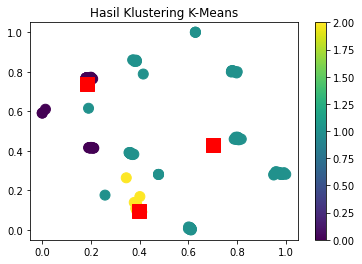

In [12]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar(output)
plt.show()

In [13]:
df

,Phe,Leu,Ile,Met,Val,Ser,Pro,Thr,Ala,Tyr,His,Gln,Asn,Lys,Asp,Glu,Cys,Trp,Arg,Gly,Status,kluster
0,8.103091,11.455717,5.209130,2.063995,7.163918,7.054712,2.140439,5.307415,3.254341,5.471224,2.413454,1.965709,3.811292,3.691165,2.555422,1.878344,7.589822,3.057770,3.505515,3.571039,0,1
1,8.081249,11.422955,5.209130,2.085836,7.152998,7.065633,2.151360,5.318336,3.254341,5.503986,2.391613,1.998471,3.789451,3.691165,2.555422,1.878344,7.600743,3.046849,3.505515,3.592880,0,1
2,8.124932,11.412035,5.230971,2.096757,7.174839,7.032871,2.140439,5.263733,3.243420,5.482145,2.424375,2.009392,3.811292,3.691165,2.555422,1.878344,7.600743,3.068691,3.472753,3.581959,0,1
3,8.010477,11.502783,5.238459,2.084470,7.137400,7.028266,2.171778,5.282113,3.208556,5.500382,2.324566,1.975336,3.765142,3.688748,2.553749,1.877114,7.683073,3.044854,3.568700,3.634181,0,1
4,8.010477,11.491869,5.216632,2.084470,7.148314,7.039179,2.160864,5.303940,3.197643,5.478555,2.357307,1.986249,3.754229,3.688748,2.575576,1.877114,7.704900,3.044854,3.525046,3.623267,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,4.573535,17.028697,5.649661,2.939418,6.556397,8.489438,3.756477,5.649661,4.105221,3.527302,3.328019,3.357912,2.819849,3.427660,1.195695,1.554404,5.031885,2.032682,5.141491,2.909526,2,0
362,4.511952,17.041833,5.627490,2.978088,6.484064,8.486056,3.824701,5.617530,4.163347,3.466135,3.366534,3.356574,2.838645,3.436255,1.205179,1.563745,5.039841,2.021912,5.179283,2.918327,2,0
363,5.469762,9.285643,4.164591,1.285245,6.187108,8.707781,3.736176,5.439872,4.463485,5.250573,3.616619,3.018830,3.367540,3.327688,2.949088,2.401116,6.705191,2.560526,5.987845,4.553153,2,2
364,4.560912,17.053411,5.701140,2.960592,6.541308,8.461692,3.770754,5.631126,4.110822,3.530706,3.330666,3.370674,2.790558,3.420684,1.190238,1.550310,5.061012,2.040408,5.141028,2.900580,2,0
